<a href="https://colab.research.google.com/github/Yaswanthyarra/LGMVIP--DataScience/blob/main/LSTMStockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential





In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

df['Date'] = pd.to_datetime(df['Date'])

#Sorting the date values in ascending order (past to future) so that we can make predictions based on the time series
df = df.sort_values('Date')

df.head(10)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78


Text(0, 0.5, 'Open')

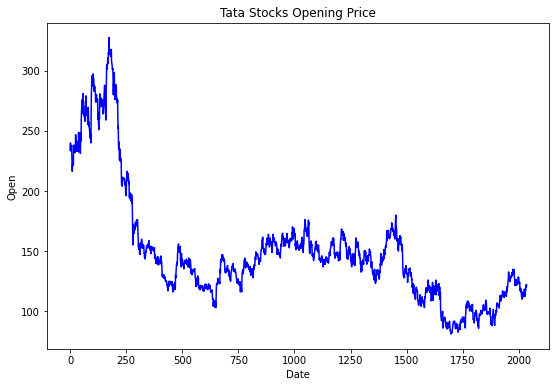

In [ ]:
plt.figure(figsize = (9,6))
plt.title('Tata Stocks Opening Price')

plt.plot(df['Open'],'b')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Open',fontsize=10)


In [ ]:
#Scaling the data to value between 0-1 and reshaping the np.array to 2D array with 1 column
data_open = df.reset_index()['Open']

scaler = MinMaxScaler(feature_range = (0, 1))
data_open = scaler.fit_transform(np.array(data_open).reshape(-1, 1))
data_open.head(10)

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [ ]:
train_s = int(len(data_open)*0.70)
test_s = len(data_open) - train_s
train, test = data_open[0 : train_s, :1], data_open[train_s : len(data_open), :1]

In [ ]:
def create_train_test(ds, step=1):
    dX, dY = [], []
    for i in range(len(ds)-step-1):
        dY.append(ds[i+step,0])
        dX.append(ds[i:(i+step),0])
        
    return np.array(dX), np.array(dY)
step=100 
X_train, y_train = create_train_test(train, step)
X_test, y_test = create_train_test(test, step)
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(1323, 100) (1323,) (510, 100) (510,)


In [ ]:
#The purpose of this reshaping is to convert the 2D array into a 3D array that is compatible with the input shape expected by certain types of machine learning models.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
#Constructing the layers of the Neural Network using LSTM layers
model_lstm = Sequential()
model_lstm.add(LSTM(60, return_sequences=True,input_shape=(100,1)))
model_lstm.add(LSTM(60,return_sequences=True))
model_lstm.add(LSTM(60))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_absolute_error',optimizer='adam')
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 60)           14880     
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           29040     
                                                                 
 lstm_11 (LSTM)              (None, 60)                29040     
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
history = model_lstm.fit(X_train, y_train, validation_split=0.1, epochs=77, batch_size=64, verbose=1, shuffle=True)

Epoch 1/77
19/19 [==============================] - 15s 328ms/step - loss: 0.0629 - val_loss: 0.0298
Epoch 2/77
19/19 [==============================] - 5s 241ms/step - loss: 0.0258 - val_loss: 0.0293
Epoch 3/77
19/19 [==============================] - 6s 288ms/step - loss: 0.0227 - val_loss: 0.0256
Epoch 4/77
19/19 [==============================] - 4s 231ms/step - loss: 0.0218 - val_loss: 0.0234
Epoch 5/77
19/19 [==============================] - 6s 294ms/step - loss: 0.0209 - val_loss: 0.0237
Epoch 6/77
19/19 [==============================] - 4s 225ms/step - loss: 0.0198 - val_loss: 0.0220
Epoch 7/77
19/19 [==============================] - 4s 234ms/step - loss: 0.0194 - val_loss: 0.0219
Epoch 8/77
19/19 [==============================] - 6s 296ms/step - loss: 0.0196 - val_loss: 0.0203
Epoch 9/77
19/19 [==============================] - 4s 226ms/step - loss: 0.0184 - val_loss: 0.0194
Epoch 10/77
19/19 [==============================] - 5s 240ms/step - loss: 0.0185 - val_loss: 0.018

Best Validation Loss: 0.0075


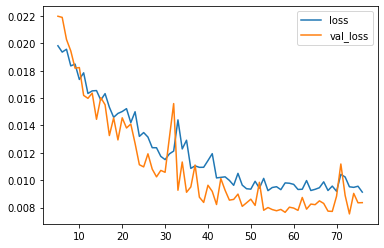

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()


print(("Best Validation Loss: {:0.4f}")\
      .format(history_df['val_loss'].min()))

In [ ]:
#Predicting the open price on both x_train and x_test 
train_predct = model_lstm.predict(X_train)
test_predct = model_lstm.predict(X_test)
#To transform the predicted scaled values back to their original scale
train_predct = scaler.inverse_transform(train_predct)
test_predct = scaler.inverse_transform(test_predct)
# To determine the mean squared error
print(math.sqrt(mean_squared_error(y_train, train_predct)))
print(math.sqrt(mean_squared_error(y_test,test_predct)))

scores = model_lstm.evaluate(X_test, y_test, verbose=0)

# Extract the MAE from the scores


print("MAE:", scores)

16/16 [==============================] - 1s 51ms/step
132.84913955218832
203.898617353242
MAE: 0.03522482141852379
